In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
PORT=9878
import veneer
v = veneer.Veneer(PORT)

In [3]:
v.source_version()

[4, 7, 0, 8165]

In [4]:
network = v.network()

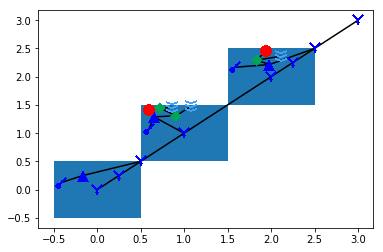

In [5]:
network.plot(links={'color':'black'})

In [6]:
v.model.node.storages.names()

['StorageOnlyStorage', 'IrrigationOnlyStorage', 'BothStorage']

## LVA Tables (Storage Geometry)

We can retrieve the geometry of a given storage.

We can also set the geometry of a storage (or set multiple storages to the same geometry)

In [8]:
lva = v.model.node.storages.lva('IrrigationOnlyStorage')
lva

,level,area,volume
0,0,0,0
1,80,1600000,16000000
2,96,1920000,16000000


In [9]:
scaled_lva = lva * 2
scaled_lva

,level,area,volume
0,0,0,0
1,160,3200000,32000000
2,192,3840000,32000000


In [10]:
# v.model.node.storages.load_lva(scaled_lva)   # Would load the same table into ALL storages
# v.model.node.storages.load_lva(scaled_lva,nodes=['StorageOnlyStorage','BothStorage'])   # Will load into two storages
v.model.node.storages.load_lva(scaled_lva,nodes='IrrigationOnlyStorage')

1

In [11]:
v.model.node.storages.lva('IrrigationOnlyStorage')

,level,area,volume
0,0,0,0
1,160,32000000,3200000
2,192,32000000,3840000


## Specifying full supply and initial conditions

Storage full supply and initial conditions can be specified by either Level or Volume.

A method exists for specifying Full Supply including whether it should be considered a Level or a Volume.

Initial conditions should then be set by either '

In [ ]:
v.model.node.storages.set_full_supply(95000,'Volume',nodes='IrrigationOnlyStorage')

In [ ]:
v.model.node.storages.set_param_values('InitialVolume',50000,nodes='IrrigationOnlyStorage')
# OR
# v.model.node.storages.set_param_values('InitialStorageLevel',4.5,nodes='IrrigationOnlyStorage')

## Releases

We can query outlet paths and individual release mechanisms.

We can also create and parameterise new mechanisms

In [16]:
v.model.node.storages.outlets(nodes='IrrigationOnlyStorage')

['IrrigationOnlyStorageOverflow', 'IrrigationOnlyTotalWaterLink']

In [17]:
v.model.node.storages.releases(nodes='IrrigationOnlyStorage',path=1)

['Ungated Spillway #0']

In [18]:
v.model.node.storages.release_table('IrrigationOnlyStorage','Ungated Spillway #0')

,level,minimum,maximum
0,0,0.000000,0.000000
1,5,0.000000,0.000000
2,6,1157.407407,1157.407407


We can create each type of release mechanism.

In each case we need to provide a table of level, minimum (release) and maximum (release). (units m, m^3.s^-1, m^3.s^-1, respectively)


In [19]:
release_table = [(0,0,0),(1,1,1),(5,10,12)]
release_table = pd.DataFrame(release_table,columns=['level','minimum','maximum'])
release_table

,level,minimum,maximum
0,0,0,0
1,1,1,1
2,5,10,12


In [ ]:
# To a particular outlet or a particular storage
#v.model.node.storages.add_valve(release_table,'IrrigationOnlyStorageOverflow',nodes='IrrigationOnlyStorage') 

# Add the same valve to EVERY storage (on first outlet path)
#v.model.node.storages.add_valve(release_table) 

# Optionally specify the name of the release
#v.model.node.storages.add_valve(release_table,name='my new valve')

